In [1]:
import pandas as pd
import yfinance as yf

# Download historical data
df = yf.download('AMZN', start='2020-01-01', end='2025-12-31')

# Keep relevant columns
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [2]:
# Shift 'Close' to create the next day's price as the target
df['Next_Close'] = df['Close'].shift(-1)

# Drop last row (NaN in target)
df.dropna(inplace=True)

# Define features (X) and target (y)
X = df[['Open', 'High', 'Low', 'Close', 'Volume']]
y = df['Next_Close']

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

Mean Squared Error: 17.01


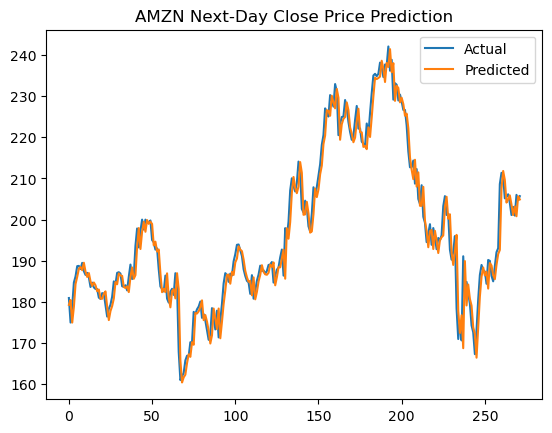

In [4]:
import matplotlib.pyplot as plt

# Calculate error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot actual vs. predicted
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('AMZN Next-Day Close Price Prediction')
plt.legend()
plt.show()